# Regresión lineal

En este notebook de vamos a ver cómo modelar datos mediante regresion lineal (multivariada), interpretando los resultados y discutiendo las limitaciones.

Vamos a introducir por primera vez en la materia a la libreria de Python scikit-learn (https://scikit-learn.org/)

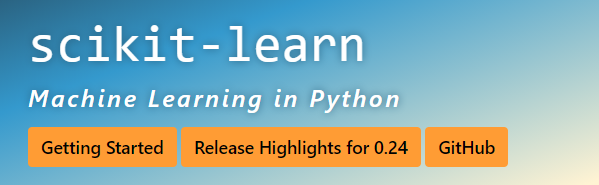


Scikit-learn no solamente es útil, sino que su documentación es excelente. Les recomendamos entrar a la página web y explorarla. Creemos que es posible aprender un montón de machine learning únicamente mirando la documentación de scikit-learn.

Vamos a inventarnos un dataset para trabajar en este notebook. El dataset va a constar de una variable dependiente (cantidad de unidades vendidas) y las siguientes dos variables independientes: precio por unidad y gasto publicitario.

El dataset va a ser "sintético", creado por nosotros mismos. Primero inventamos valores para el precio por unidad y la inversión publicitaria

In [1]:
import numpy as np

precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])

precio.shape
gasto.shape

(13,)

Ahora, vamos a construir la variable dependiente, "ventas". 

Primero, vamos a considerar un coeficiente negativo por "precio" sumado a un término de error:


In [2]:
X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en una matriz

print(X.shape)
print(X)

(13, 1)
[[ 24]
 [ 30]
 [ 43]
 [101]
 [ 34]
 [ 94]
 [ 10]
 [ 15]
 [ 12]
 [ 44]
 [202]
 [156]
 [ 90]]


In [3]:
beta, beta0 = -0.3, 100

mu, sigma = 0, 10 # media y disvio standard del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(np.transpose(X), beta) + beta0 + epsilon).round()
y = np.transpose(y)

print(y)

[[ 92.]
 [107.]
 [100.]
 [ 79.]
 [100.]
 [ 66.]
 [ 96.]
 [ 93.]
 [111.]
 [ 73.]
 [ 43.]
 [ 57.]
 [ 54.]]


Podemos hacer el plot de una variable contra la otra y ver que sugiere que existe una relación lineal entre ambas:

Text(0.5, 0, 'Precio por unidad')

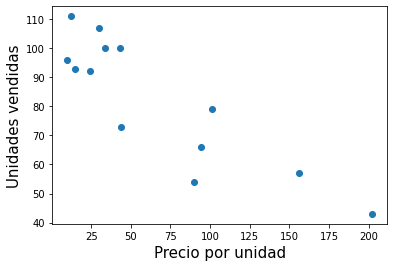

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.ylabel(r'Unidades vendidas', fontsize = 15, color = 'black')
plt.xlabel(r'Precio por unidad', fontsize = 15, color = 'black')


In [6]:
print(y)

for n, val in enumerate(y):
    print(n)
    print(val)

[[ 92.]
 [107.]
 [100.]
 [ 79.]
 [100.]
 [ 66.]
 [ 96.]
 [ 93.]
 [111.]
 [ 73.]
 [ 43.]
 [ 57.]
 [ 54.]]
0
[92.]
1
[107.]
2
[100.]
3
[79.]
4
[100.]
5
[66.]
6
[96.]
7
[93.]
8
[111.]
9
[73.]
10
[43.]
11
[57.]
12
[54.]


Vimos que el objetivo de la regresión lineal es encontrar parámetros beta0, beta1 tales que minimicen el error cuadrático medio. Esto lo vamos a hacer más adelante con scikit-learn. 

Antes, podemos ilustrar el problema a resolver de la siguiente manera. Definamos una función que encuentra el error cuadrático medio dados parámetros beta0, beta1.

In [7]:
def error_cuadratico_medio(X, y, beta):
    error = 0.0
    for n, val in enumerate(y):
        y_est = beta[0] + beta[1] * X[n]
        error = error + (y_est - y[n]) ** 2
    return error / len(y)

Ahora puedo adivinar valores de veta y obtener el error asociado

In [8]:
print(error_cuadratico_medio(X, y, [60, 0.4]))
print(error_cuadratico_medio(X, y, [60, -0.4]))
print(error_cuadratico_medio(X, y, [-60, 0.4]))
print(error_cuadratico_medio(X, y, [100, -0.3])) # este es el valor real de los parámetros




[1839.59076923]
[2496.57538462]
[15298.05230769]
[111.26692308]


Visualicemos la curva tridimensional que tengo que minimizar para encontrar los parámetros: la curva del error cuadrático medio vs. beta0 y beta1

Text(0.5, 0, 'beta1')

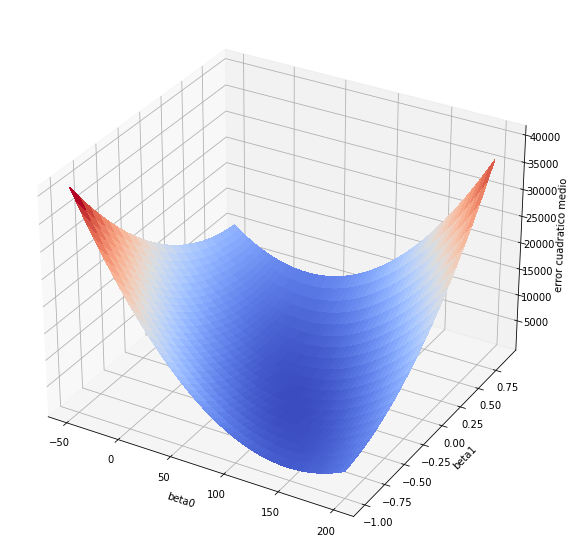

In [9]:
beta0 = np.arange(-50, 200, 0.25)
beta = np.arange(-1, 1, 0.1)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X, y, [X0, Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
ax.set_zlabel("error cuadratico medio")
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')

Ahora ajustemos un modelo de regresión lineal a los datos usando sci-kit learn

El proceso de ajustar modelos con scikit-learn es siempre el mismo:
1. Creamos un objeto que representa el modelo, pasandole los parámetros correspondientes.
2. Entrenamos el moedlo con los datos
3. Usamos el modelo para predecir el valor de los nuevos datos

NameError: name 'reg' is not defined

In [11]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression()
reg.fit(X,y)



estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

[array([103.52751149]), array([[-0.32147094]])]


In [12]:
print(reg.intercept_, reg.coef_)

[103.52751149] [[-0.32147094]]


In [13]:
R2 = reg.score(X, y) # R2
print(R2)

0.7642570418461732


Vamos a graficar la recta teórica junto con la que mejor ajusta a los datos.

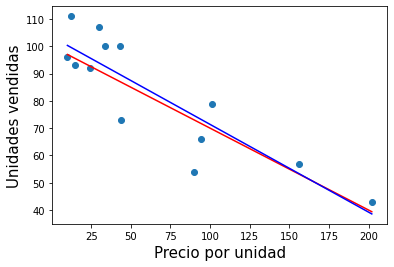

In [14]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

plt.plot(x_var,np.transpose(y_var_est),label="Real", color='r')
plt.plot(x_var,np.transpose(y_var),label="Estimated", color='b')



Podemos graficar fácilmente los intervalor de confianza de 95% usando seaborn

/home/franco/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Unidades vendidas')

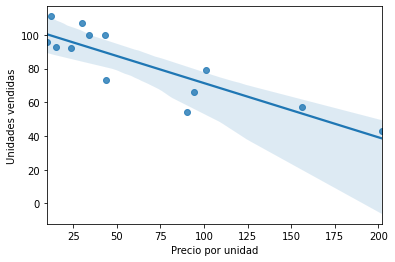

In [15]:
import seaborn as sns

ax = sns.regplot(X, y, ci = 99)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')

Supongamos que agregamos más datos y conocemos el precio por unidad ¿Cuál es la predicci on sobre la cantidad de unidades vendidas?



Text(0.5, 0, 'Precio por unidad')

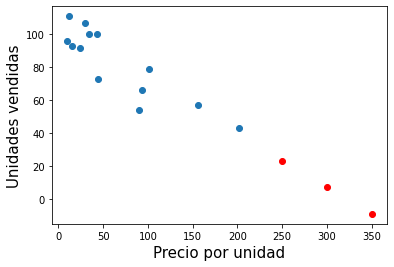

In [16]:
precios_nuevos = np.array([250, 300, 350])
X_nuevo = precios_nuevos.reshape(-1, 1)

y_nuevo = reg.predict(X_nuevo) # hago la predicción para estos nuevos valores

plt.scatter(X, y)
plt.scatter(X_nuevo, y_nuevo, color = 'r')

plt.ylabel(r'Unidades vendidas', fontsize = 15, color = 'black')
plt.xlabel(r'Precio por unidad', fontsize = 15, color = 'black')

Veamos por último el caso de la regresión usando dos valores independientes: el precio por unidad y el gasto de publicidad.

Primero creo una matriz que contenga ambas variables y luego simulo los datos multipliocando cada fila por su coeficiente y agregando ruido normalmente distribuido.

In [17]:
X = np.column_stack((precio, gasto)) #variables independientes
beta = np.array([-0.3, 0.1]) #parámetros
beta0 = 20

mu, sigma = 0, 10 # media y desvio standart del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(X, beta) + beta0 + epsilon).round()

Ahora que ya simulé los datos, voy a crear y estimular el modelo de regresión

In [18]:
reg = LinearRegression()
reg.fit(X, y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(reg.coef_)
print(estimated)

[-0.26479018  0.09860246]
[18.853300374391722, -0.26479017920658054, 0.0986024648546126]


In [19]:
R2 = reg.score(X, y) #R2
print(R2)

0.9983374972408926
